# Analiza toru lotu skoczka narciarskiego :)

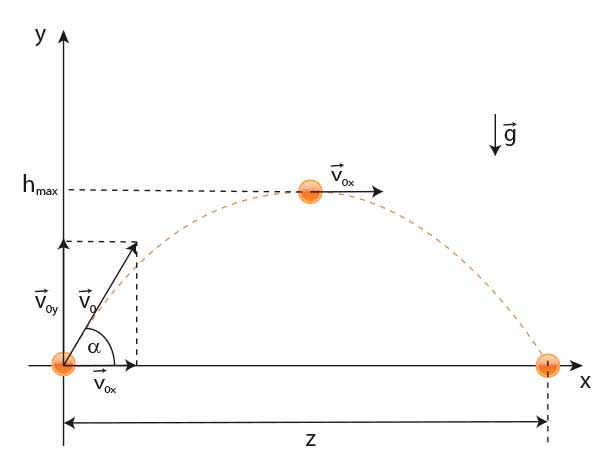

In [1]:
#import Pkg
#Pkg.add("Images")
#using Images
#img = load("C:\Users\szczy\Documents\GitHub\rownania_rozniczkowe")
using Plots

In [2]:
# dane
g = 9.81
m = 65
vx₀ = 26.5
α = π / 9
vy₀=26.5
v₀=26.5
# obliczenia


h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5
czas = (2 * v₀ * sin(α)) / g

1.8478152493639592

In [3]:
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)
#z2=(-2*v₀^2*sin(α)*cos(α)+sqrt(delta))/(-2*g)#wychodzi ujemne więc bierzemy z1

126.17252359219117

In [4]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)

#t2=(-v₀*sin(α)+sqrt(delta2))/(-g) ujemne wiec do wyjebania

5.066792268075566

# 1. Bez uwzględnienia oporów powietrza

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(v_o\cos{\alpha})t $$

$$y(t)=(v_o\sin{\alpha})t-\frac{1}{2}gt^2$$

Wzory opisujące prędkości:

$$v_x=v_o\cos{\alpha}$$

$$v_y(t)=v_o\sin{\alpha} - gt$$

In [5]:
function x(v₀, α)
    t -> v₀ * t * cos(α)
end

function y(v₀, α, g,h)
    t -> h+v₀ * t * sin(α) - (g * t ^ 2) / 2
end

function v_x(v₀, α)
    t -> v₀ * cos(α)
end

function v_y(v₀, α, g)
    t -> v₀ * sin(α) - g * t
end

v_y (generic function with 1 method)

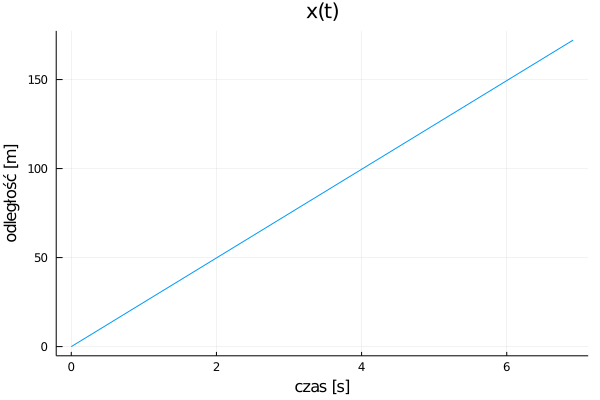

In [6]:
plot(x(vx₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "odległość [m]",
    legend = :none,
    title = "x(t)")

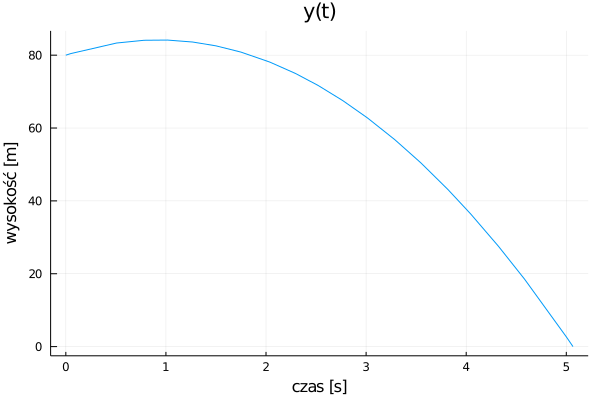

In [7]:
plot(y(vy₀, α, g,h), 0, t1,
    xlabel = "czas [s]", 
    ylabel = "wysokość [m]", 
    legend =:none,
    title = "y(t)")

┌ Info: Saved animation to 
│   fn = C:\Users\szczy\Documents\GitHub\rownania_rozniczkowe\rzut1.gif
└ @ Plots C:\Users\szczy\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\szczy\\Documents\\GitHub\\rownania_rozniczkowe\\rzut1.gif")
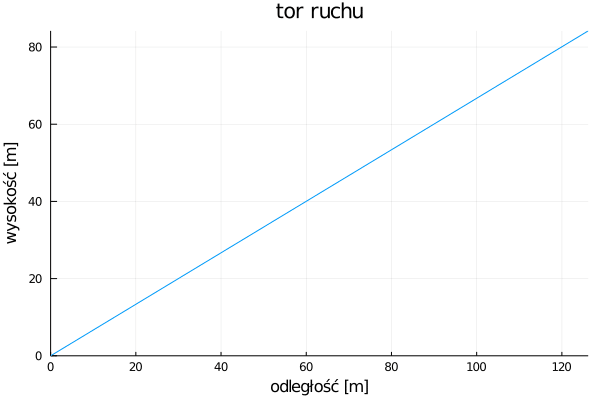

In [8]:
a = @animate for i in LinRange(0, czas+t1, 500)
    plot([0, zasieg], [0, hₘ], flip = false)
    
    plot!(x(vx₀, α), y(vy₀, α, g,h), 0, i,
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend = :none,
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        title = "tor ruchu")  
end

gif(a, "rzut1.gif", fps = 30)

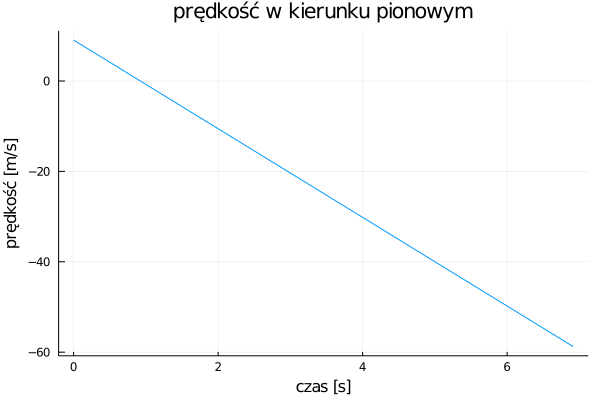

In [9]:
plot(v_y(vy₀, α, g), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "prędkość [m/s]",
    legend = :none,
    title = "prędkość w kierunku pionowym")

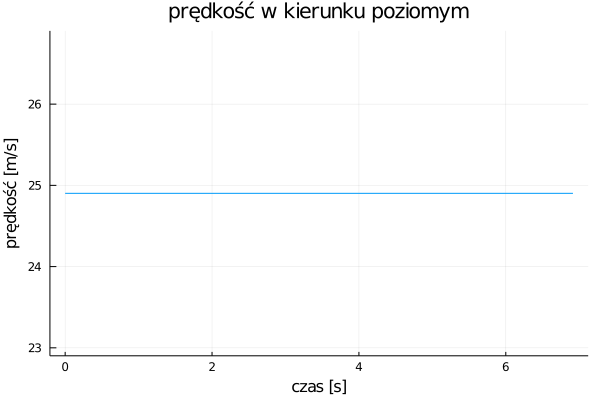

In [10]:
plot(v_x(v₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "prędkość [m/s]",
    ylim = (v₀ * cos(α) - 2, v₀ * cos(α) + 2),
    legend =:none,
    title = "prędkość w kierunku poziomym")

# 2. Z uwzględnieniem oporów powietrza

In [11]:
# dane
k = 0.5#współczynnik oporu

0.5

W naturalnych warunkach na skoczka działają trzy siły: siła cięzkości, nośna oraz oporu.
Na początek skupimy się na działaniu siły oporu. Zuwagi na to, że skoczek porusza się w powietrzu mamy do czynienia z działaniem oporu aeorydanamicznego:
$$D=-\frac{1}{2}CS{\rho}v^2$$, gdzie: $$C$$- doświadczalnie wyznaczany współczynnik oporu aerodynamicznego,$$S$$-pole przekroju ciała, $$\rho$$ - gęstość powietrza, $$v$$- prędkość względna.
Dla ułatwienia obliczeń przyjmijmy, że siłę oporu definiuje wzór:
$$D=-kv$$

# a) rozwiązanie analityczne

W pierwszej kolejności postaramy się znaleźć analityczne rozwiązanie toru ruchu skoczka narciarskiego.

Siła oporu:

$$D=-kv$$

Prędkość początkową definują wzory:

$$v_x=v_o\sin{\alpha}, v_y=v_o\cos{\alpha}$$

$$\vec{v_o}=(v_x,v_y)$$




Z drugiej zasady dynamiki Newtona wynika, że:
$$F=ma$$
, stąd ruch ciała opisuje układ równań:

$$ ma_x=kv_x$$

$$ma_y=-mg-kv_y$$

Wiadomo także, że przyśpieszenie to druga pochodna po czasie, zatem:

$$ m\frac{d^2x}{dt^2}=k\frac{dx}{dt}$$

$$m\frac{dy^2}{dt^2}=-mg-k\frac{dy}{dt}$$

Jest to układ równań liniowych drugiego rzędu. Ustalamy warunki początkowe:

$$x(0)=0, y(0)=80$$

Dokonując podstawienia:

$$u=\frac{dx}{dt} $$$$z=\frac{dy}{dt}$$

otrzymamy układ równać postaci:
$$u(t)=C\exp{(\frac{-k}{m}t)}$$
$$z(t)=...$$

Odpowiednio całkując i wykorzystując warunki początkowe otrzymujemy układ równań opisujących tor lotu skoczka narciarskiego z oporami powietrza:

$$x(t)=(\frac{m}{k}v_o\cos{\alpha})(1-e^{\frac{-k}{m}{t}}) $$

$$y(t)=(\frac{m}{k}v_o\sin{\alpha}+\frac{m^{2}}{k^{2}}g)(1-e^{\frac{-k}{m}{t}})-\frac{m}{k}gt$$

In [12]:
function x_opor(m, k, v₀, α)
    t -> m / k * v₀ * cos(α) * (1 - exp((-k / m) * t))
end

function y_opor(m, k, v₀, α, g,h)
    t ->h + (m / k * v₀ * sin(α) + (m / k)^2 * g) * (1 - exp((-k / m) * t)) - (m / k) * g * t
end

y_opor (generic function with 1 method)

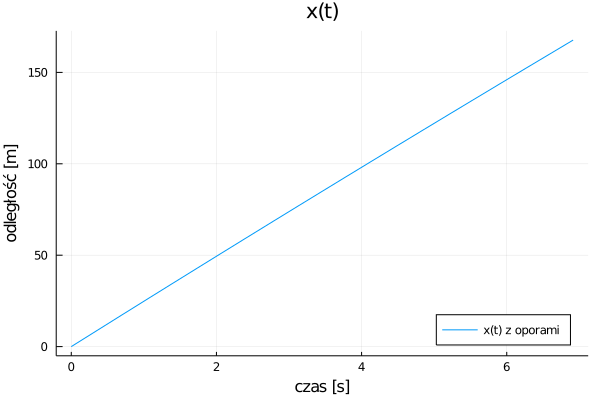

In [13]:
plot(x_opor(m, k, v₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "odległość [m]", 
    label = "x(t) z oporami",
    legend = :bottomright,
    title = "x(t)")

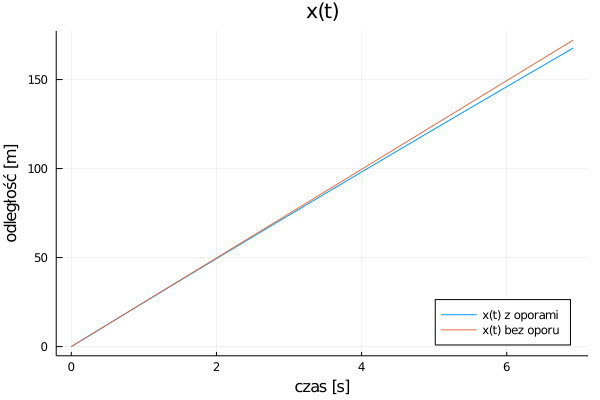

In [14]:
plot!(x(v₀, α), 0, czas+t1,
    label = "x(t) bez oporu")

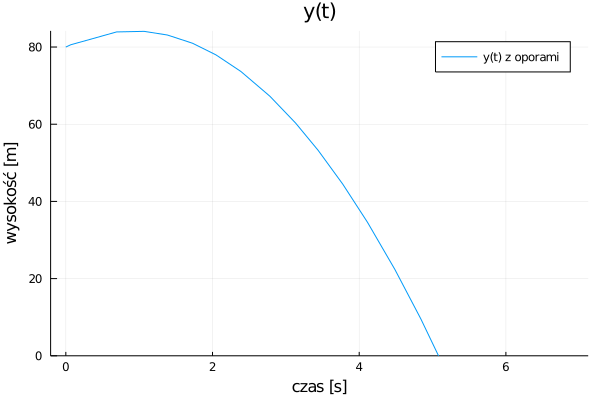

In [15]:
plot(y_opor(m, k, v₀, α, g,h), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "wysokość [m]", 
    label = "y(t) z oporami",
    legend = :topright,
    ylim = (0, hₘ),
    title = "y(t)")

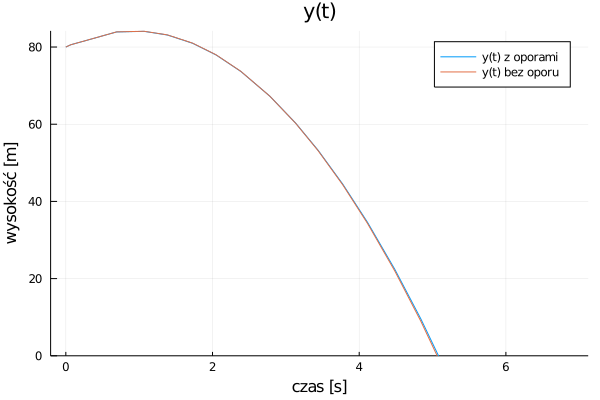

In [16]:
plot!(y(v₀, α, g,h), 0, czas+t1,
    label = "y(t) bez oporu")

┌ Info: Saved animation to 
│   fn = C:\Users\szczy\Documents\GitHub\rownania_rozniczkowe\rzut2.gif
└ @ Plots C:\Users\szczy\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\szczy\\Documents\\GitHub\\rownania_rozniczkowe\\rzut2.gif")
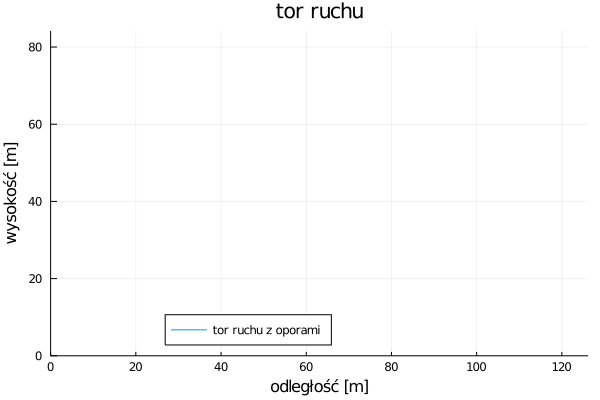

In [17]:
a = @animate for i in LinRange(0, t1+czas, 500)
    
    plot(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, i,
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        label = "tor ruchu z oporami",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend = :bottom,
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        title = "tor ruchu")
end

gif(a, "rzut2.gif", fps = 30)

In [18]:
function skocznia(zasieg,h)
    for i in zasieg
        for j in h
            i->(-j)
        end
    end
end

skocznia (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\szczy\Documents\GitHub\rownania_rozniczkowe\rzut3.gif
└ @ Plots C:\Users\szczy\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\szczy\\Documents\\GitHub\\rownania_rozniczkowe\\rzut3.gif")
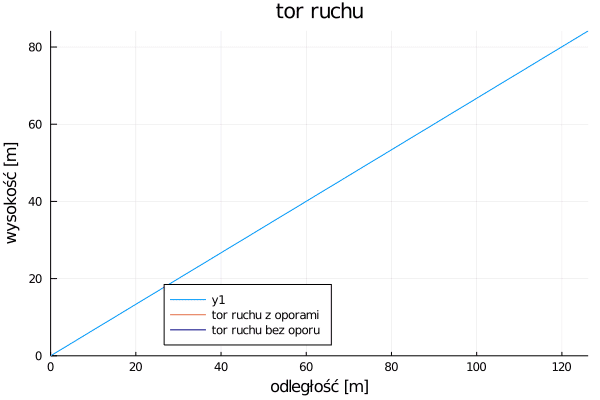

In [19]:
a = @animate for i in LinRange(0, czas+t1, 500)
    plot([0, zasieg], [0, hₘ], flip = false)
    
    plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, i,
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        label = "tor ruchu z oporami",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend = :bottom,
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        title = "tor ruchu")
    
    plot!(x(v₀, α), y(v₀, α, g,h), 0, i,
        label = "tor ruchu bez oporu",
        lims = (0, zasieg),
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        linecolor = "navy",
        ylims = (0, hₘ)) 
end

gif(a, "rzut3.gif", fps = 30)

# b) rozwiązanie numeryczne - metoda Eulera

Koszt obliczeń rozwiązania analitycznygeo może być zbyt duży, z uwagi na występowanie funkcji exp(). Rozwiązanie numeryczne jest bardziej wydajne. Metody numeryczne pozwalają otrzymać zadowalający wynik, minimalnie różniący się od otrzymanego metodami analitycznymi.


Wykorzystamy przybliżenie:

$$a=\frac{\Delta{v}}{\Delta{t}}$$

Korzystając z wcześniej wyprowadzonych równań ruchu mamy:////odnośnik

$$ m\frac{\Delta{v_x}}{\Delta{t}}=kv_x$$

$$m\frac{\Delta{v_y}}{\Delta{t}}=-mg-kv_y$$

Korzystając z war. pocz. i pręd.///odnośnik oraz metody Eulera:

$$\frac{\Delta{y}}{\Delta{t}}=f(y,t), y(0)=y_o$$

$$\frac{y_{j+1}-y_j}{\Delta{t}}=f(y_j,t_j)$$

$$y_{j+1}=y_j+(\Delta{t})f(y_j,t_j)$$


Stąd otrzymujemy wzory opisujące ruch skoczka z uwzględnieniem oporów powietrza:

$$ v_x(t_{j+1})=v_x(t_j)-\frac{k}{m}v_x(t_j)\Delta{t} $$

$$ v_y(t_{j+1})=v_y(t_j)-g\Delta{t}-\frac{k}{m}v_y(t_j)\Delta{t} $$

$$x(t_{j+1})=x(t_j)+v_x(t_j)\Delta{t}-\frac{1}{2}\frac{k}{m}v_x(t_j)\Delta{t^2}  $$

$$y(t_{j+1})=y(t_j)+v_y(t_j)\Delta{t}-\frac{1}{2}g\Delta{t^2}-\frac{1}{2}\frac{k}{m}v_y(t_j)\Delta{t^2}$$

In [20]:
dt = 0.001 #milisekundy, 1/1000 sekundy

0.001

In [21]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, (czas+t1)/ dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1)  / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

In [22]:
function v_yy(v₀, α, g)
    t -> v₀ * sin(α) - g * t / 1000
end

v_yy (generic function with 1 method)

In [23]:
h=80
czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_num(v₀, α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor

5086

In [39]:
t1+czas

10.197866036362608

In [24]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

124.18138621731977

In [25]:
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h, dt))

84.16718482058853

In [26]:
czas_wznoszenia = 0
for i in (1 : floor(Int, czas+t1 / dt))
    if abs(y_num(v₀, α, k, m, g,h, dt)[i]) == hₘ_opor
        czas_wznoszenia = i
    end
end
println("czas wznoszenia - ", czas_wznoszenia, " [ms]")
println("czas spadania - ", czas_opor - czas_wznoszenia, " [ms]")

czas wznoszenia - 922 [ms]
czas spadania - 4164 [ms]


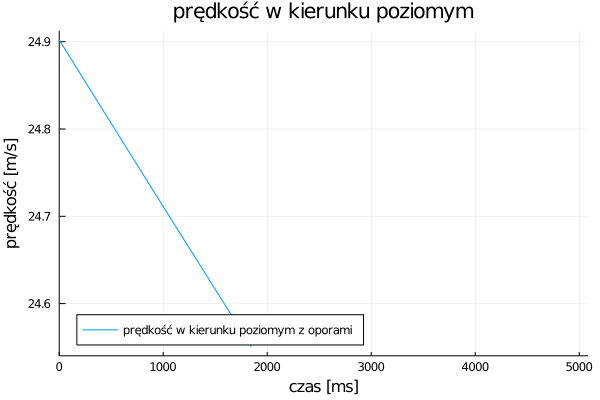

In [27]:
plot(vx_num(v₀, α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym")

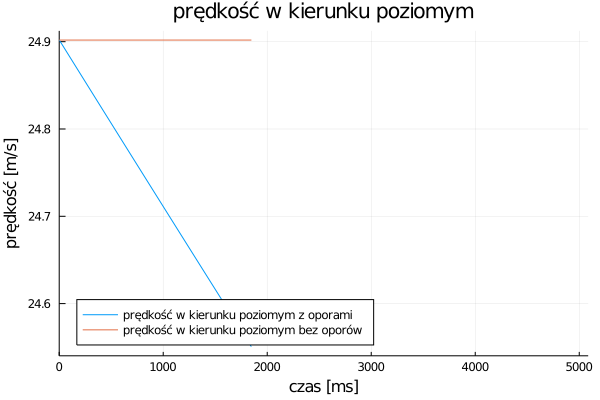

In [28]:
plot!(v_x(v₀, α), 0, czas * 1000,
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym bez oporów")

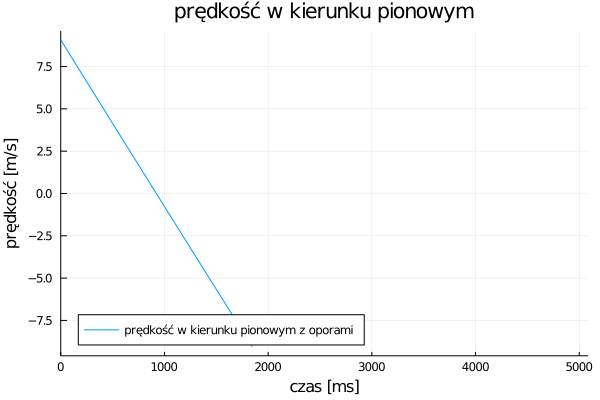

In [29]:
plot(vy_num(v₀, α, k, m, g, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym")

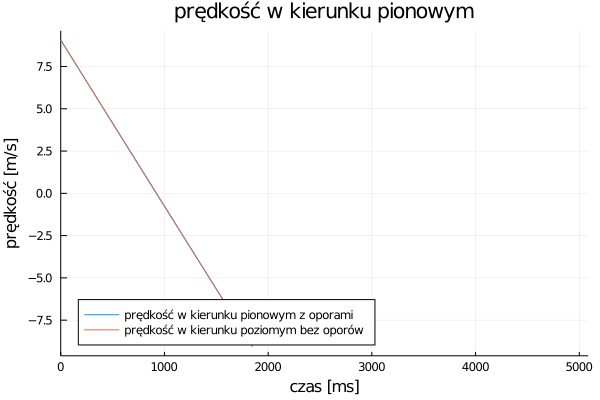

In [30]:
plot!(v_yy(v₀, α, g), 0, czas * 1000,
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym bez oporów")

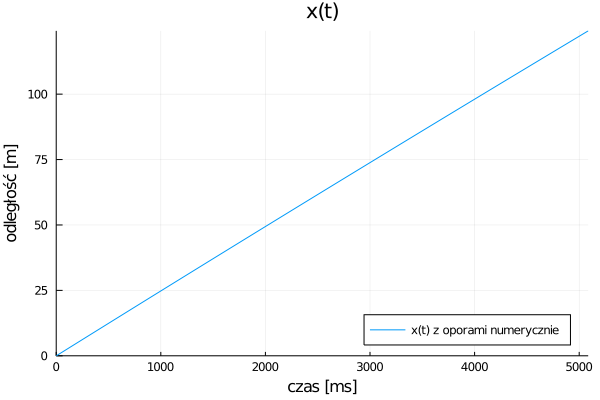

In [31]:
plot(x_num(v₀, α, k, m, dt),
    xlabel = "czas [ms]",
    ylabel = "odległość [m]", 
    label = "x(t) z oporami numerycznie",
    legend = :bottomright,
    xlim = (0, czas_opor),
    ylim = (0, zasieg_opor),
    title = "x(t)")

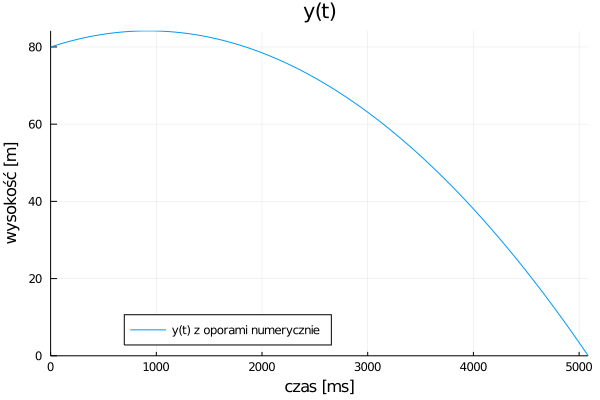

In [32]:
plot(y_num(v₀, α, k, m, g,h, dt),
    xlabel = "czas [ms]", 
    ylabel = "wysokość [m]",
    label = "y(t) z oporami numerycznie",
    legend = :bottom,
    xlim = (0, czas_opor),
    ylim = (0, hₘ_opor),
    title = "y(t)")

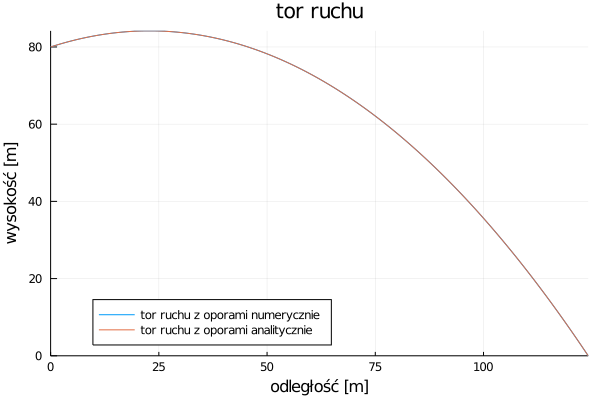

In [33]:
plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, czas_opor / 1000,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

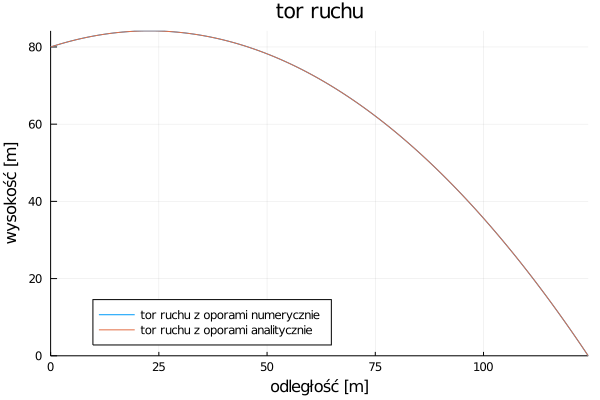

In [34]:
dt = 0.01

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g, h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

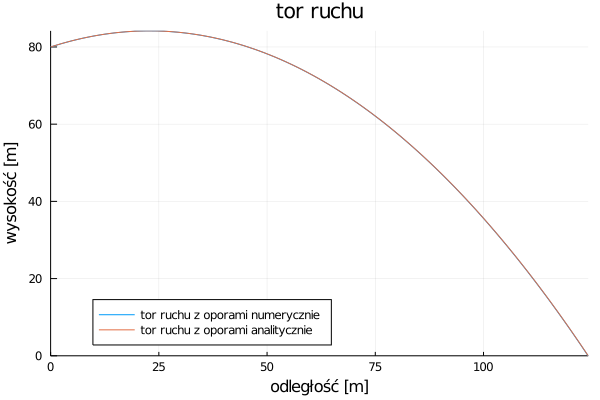

In [35]:
dt = 0.1

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]",
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

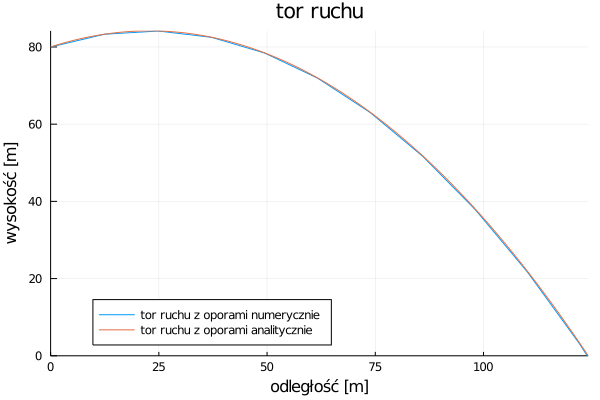

In [36]:
dt = 0.5

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g, h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))